In [30]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ECD_control.SNAP_tools.SNAP_tools import *
from ECD_control.ECD_tools.ECD_tools import *
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
chi = -2*np.pi*1e-3*1.0
thetas = [np.pi/2,-np.pi/2.0, np.pi/5.0]
s = SNAP_gate(thetas, chi)

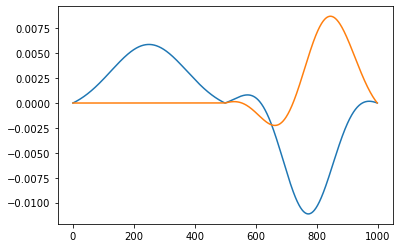

In [32]:
plt.plot(np.real(s))
plt.plot(np.imag(s))

In [53]:
#The SNAP gate used to make a fock state in the paper
alphas = [1.14,-0.58]
thetas = [[np.pi],[0]]
sigma=400
chop = 4
chi = 2*np.pi*1e-3*8.0
epsilon, Omega = SNAP_circuit(alphas, thetas, chi=chi, sigma=sigma, chop=chop)

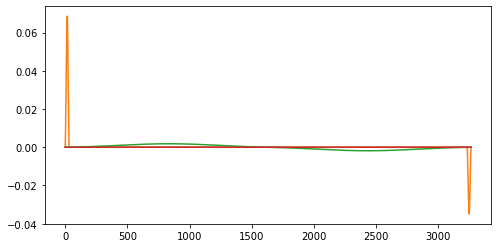

In [54]:
plot_pulse_basic(epsilon, Omega)

In [55]:
N = 30
N2 = 2
rho0 = qt.tensor(qt.basis(N2,0),qt.basis(N,0))
#rho0 = qt.tensor(qt.thermal_dm(N2, 0.05), qt.thermal_dm(N, 0.05))
me_options = {'chi':chi}
result, alpha = simulate_master_equation(epsilon = 1j*epsilon,rho0=rho0,Omega=1j*Omega, **me_options)

Solving for alpha(t)
Constructing Hamiltonian
Running mesolve:
10.0%. Run time:   0.36s. Est. time left: 00:00:00:03
20.0%. Run time:   0.57s. Est. time left: 00:00:00:02
30.0%. Run time:   0.73s. Est. time left: 00:00:00:01
40.0%. Run time:   0.90s. Est. time left: 00:00:00:01
50.0%. Run time:   1.05s. Est. time left: 00:00:00:01
60.0%. Run time:   1.18s. Est. time left: 00:00:00:00
70.0%. Run time:   1.34s. Est. time left: 00:00:00:00
80.0%. Run time:   1.49s. Est. time left: 00:00:00:00
90.0%. Run time:   1.64s. Est. time left: 00:00:00:00
Total run time:   1.80s


In [56]:
rhof = qt.ket2dm(result.states[-1])
g = qt.tensor(qt.basis(N2,0), qt.identity(N))
e = qt.tensor(qt.basis(N2,1), qt.identity(N))
rhof_g = (g.dag()*rhof*g).unit()
rhof_e = (e.dag()*rhof*e).unit()
#correct final frame
D =  qt.displace(N,alpha[-1])
rhof_g =D*rhof_g*D.dag()
rhof_e =D*rhof_e*D.dag()

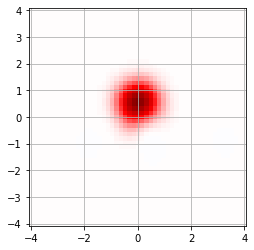

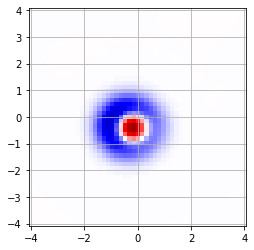

In [57]:
xvec = np.linspace(-4,4,51)
plot_wigner(rhof_g, xvec)
plot_wigner(-1*rhof_e, xvec)